## $$Computational Physics Lab-5$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Numerical Integration 1**

 Plot and integrate the tabulated data given below by a suitable method. Take the end points of the table as integration limits

In [2]:
def trap_int(y,x,a,b):
    s=0
    n=len(y)
    for i in range(n-1):
        s+=0.5*(y[i+1]+y[i])*(x[i+1]-x[i])
    
    return s

In [3]:
y=np.array([1.5,2.3,2.3,2.4,2.5,3.2,4.9,4.7,3.4,7.8,17.1])
x=np.array([1.34,1.46,1.52,1.6,1.87,2.03,2.18,2.8,3.2,3.8,4.15])

In [4]:
trap_int(y,x,x[0],x[len(x)-1])

14.592500000000005

Text(0, 0.5, 'f (x)')

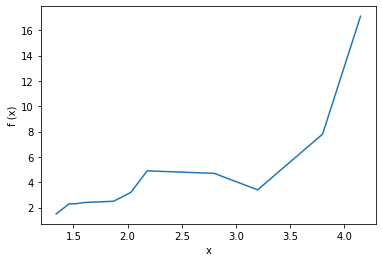

In [5]:
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("f (x)")

# **Numerical Integration 2**

Write a functionin pythontrap(f,a, b, N) which will evaluate the integral $\int_{a}^{b}f(x)dx$ using the trapezoidal rule with Nsteps.Also develop a similar function simp(f,a, b, N) for the Simpson’s rule.Use t
hese functions to evaluate thenumerical integralsin the subsequent problems, wherever applicable.

**Trapezoidal rule**

In [6]:
def trap(f,a,b,N):
    s=0
    del_x=(b-a)/N
    x=a
    for i in range (N):
        s+=0.5*(f(x+del_x)+f(x))*(del_x)
        x=x+del_x
        
    return s    

**Simpson's rule**

In [7]:
def simp(f,a,b,N):
    s=0
    del_x=(b-a)/N
    x_left=a
    x_right=x_left+del_x
    
    for i in range (N):
        s+=(del_x)*(f(x_left)+4*f((x_left+x_right)/2)+f(x_right))/6
        x_left=x_right
        x_right+=del_x
    return s

**1) Integrating $f(x)=x^2$ from $x=-1$ to $x=1$**

In [8]:
def f1(x):
    return x**2

In [9]:
a=-1
b=1
print(f"by simpson's method {simp(f1,a,b,10)}")
print(f"by Trapezoidal rule is {trap(f1,a,b,10)}")

by simpson's method 0.6666666666666669
by Trapezoidal rule is 0.6800000000000002


Text(0, 0.5, 'relative error')

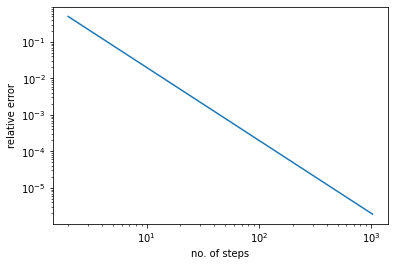

In [10]:
error_trap=[]
n=[]
for i in range (10):
    error_trap.append(abs(trap(f1,a,b,2**(i+1))-2/3)/(2/3))
    n.append(2**(i+1))

plt.loglog(n,error_trap)
plt.xlabel("no. of steps")
plt.ylabel("relative error")

Text(0, 0.5, 'relative error')

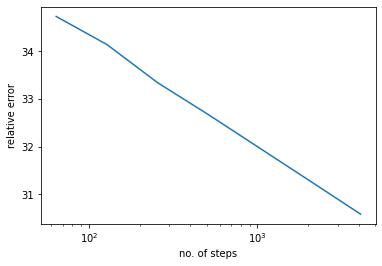

In [11]:
error_simp=[]
n=[]
for i in range (3,10):
    error_simp.append(-np.log(abs(simp(f1,a,b,2**(i+3))-2/3)/(2/3)))
    n.append(2**(i+3))

plt.xscale("log")
#plt.yscale("log")
plt.plot(n,error_simp)
plt.xlabel("no. of steps")
plt.ylabel("relative error")

here y scale is in log, since the error is close to 0, the log will be negative,

**2) Integrating $f(x)= \sin(x)$ from $x=0$ to $x= \pi$, Analytical answer= 2**

In [12]:
def f2(x):
    return np.sin(x)

a=0
b=np.pi
print(f"by simpson's method {simp(f2,a,b,1023)}")
print(f"by trapezoidal rule is {trap(f2,a,b,10)}")

by simpson's method 2.0000000000000955
by trapezoidal rule is 1.9835235375094546


Text(0, 0.5, 'relative error')

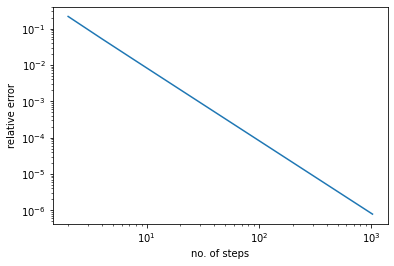

In [13]:
error_trap=[]
n=[]
for i in range (10):
    error_trap.append(abs(trap(f2,a,b,2**(i+1))-2)/2)
    n.append(2**(i+1))

plt.loglog(n,error_trap)
plt.xlabel("no. of steps")
plt.ylabel("relative error")

Text(0, 0.5, 'relative error')

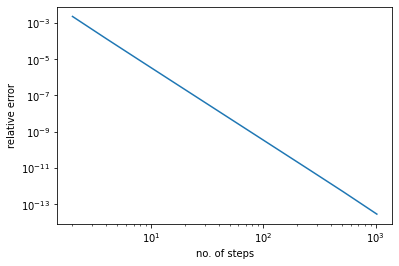

In [14]:
error_simp=[]
n=[]
for i in range (10):
    error_simp.append(abs(simp(f2,a,b,2**(i+1))-2)/2)
    n.append(2**(i+1))

plt.loglog(n,error_simp)
plt.xlabel("no. of steps")
plt.ylabel("relative error")

**3) Integrating $f(x)=\left(\frac{\sin(x)}{x}\right)^2$ from $x=0$ to $x=\infty$, Analytical answer is $\frac{\pi}{2}$**

In [15]:
def f3(x):
    if(x==0):
        return 1
    else:
        return (np.sin(x)/x)**2

a=0
b=100
print(f"by simpson's method {simp(f3,a,b,10000)}")
print(f"by trapezoidal rule is {trap(f3,a,b,10000)}")

by simpson's method 1.5658182777144996
by trapezoidal rule is 1.5658182769824784


Text(0, 0.5, 'relative error')

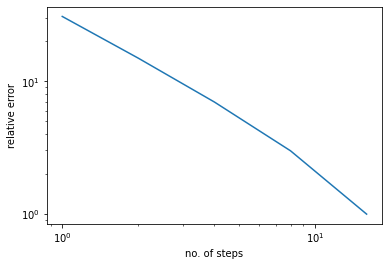

In [16]:
error_trap=[]
n3=[]
for i in range (5):
    error_trap.append(abs(trap(f3,a,b,2**(i))-np.pi/2)/(np.pi/2))
    n3.append(2**(i))

plt.xscale("log")
plt.yscale("log")
plt.plot(n3,error_trap)
plt.xlabel("no. of steps")
plt.ylabel("relative error")

Text(0, 0.5, 'relative error')

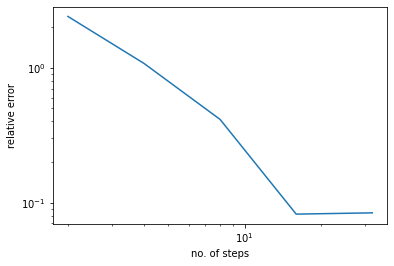

In [17]:
error_simp=[]
n=[]
for i in range (5):
    error_simp.append(abs(simp(f3,a,b,2**(i))-np.pi/2)/np.pi/2)
    n.append(2**(i+1))

plt.loglog(n,error_simp)
plt.xlabel("no. of steps")
plt.ylabel("relative error")

# Numerical Integration 4 

We consider the bound 1-D motion of a particle of mass min a time independent potential $V(x)$. The fact that the energy Ewill be conserved allows us to integrate the equation of motion and obtain a solution in closed form. The time period of the oscillation T is given by
$$T=\int_{a}^{b}\frac{\sqrt{2m}}{\sqrt{E-V(x)}}dx$$
Where the limits a and b are obtained by solving $V(x)=E, a<x<b.$ 

# a)

solving $E=V(x)$ we get $a$ and $b$ to be $\frac{+1}{\omega_o}\sqrt{\frac{2E}{m}}$ and $\frac{-1}{\omega_o}\sqrt{\frac{2E}{m}}$ respectively

given $$V(x)=\frac{1}{2}m\omega_o^2x^2$$ where $m=1 Kg, \omega_o=2\pi sec^{-1}$

substituting $y=\frac{x}{\sqrt{\frac{2E}{m\omega_o^2}}}$, we replace the limit of integrals as follows, $a$ by $-1$ and $b$ by $+1$, the integral reduces to 
$$T\omega_o=\int_{-1}^{+1}\frac{2}{\sqrt{1-y^2}}dy$$


Now solving this numerically from a value of $-1+\epsilon$  to $1-\epsilon$ we get the time period

*The expected value is $1$ sec, so the value we obtained is very close to the actual value*

In [18]:
def trap(f,a,b,N):
    s=0
    del_x=(b-a)/N
    x=a
    for i in range (N):
        s+=0.5*(f(x+del_x)+f(x))*(del_x)
        x=x+del_x
        
    return s    

In [19]:
def integral(x):
    return (2)/((1-x**2)**0.5)


Text(0, 0.5, 'Time period')

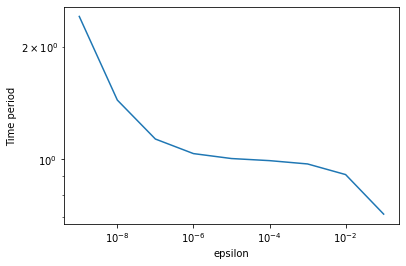

In [20]:
e=[]
T=[]
for i in range(1,10):
    epsilon=10**(-i)
    
    e.append(epsilon)
    T.append(trap(integral,-1+epsilon,1-epsilon,10000)/(2*np.pi))
plt.loglog(e,T)
plt.xlabel("epsilon")
plt.ylabel("Time period")

taking $\epsilon=10^{-4}$

In [21]:
epsilon=1e-4
Time_period=(trap(integral,-1+epsilon,1-epsilon,10000)/(2*np.pi))
print(Time_period)

0.9916473033892338


The time period that we calculated is $0.9916$ seconds which is very close to the analytical value of 1 second

# b)

Given $$V(x)=\frac{m\omega_o^2L^2}{2}[e^{\frac{x^2}{L^2}}-1]$$
equating $E=V(a)$, and putting E in the equation, we get the final integral as 
$$T=\frac{1}{5\pi}\int_{-A}^{A}\frac{dx}{\sqrt{e^{\frac{A^2}{L^2}} - e^{\frac{x^2}{L^2}}}}$$
where $A$ is the amplitude

In [22]:
def trap_b(f,A,a,b,N):
    s=0
    del_x=(b-a)/N
    x=a
    for i in range (N):
        s+=0.5*(f(x+del_x,A)+f(x,A))*(del_x)
        x=x+del_x
        
    return s    

In [23]:
def time(x,A):
    return 1/(5*np.pi*(np.e**(A**2/25)-np.e**(x**2/25))**0.5)

taking epsilon as $\epsilon=10^{-2}$

In [24]:
A=np.linspace(1e-5,15,num=20)
epsilon=1e-4
T=[]
for i in range (20):
    time_period=trap_b(time,A[i],-A[i]+A[i]*epsilon,A[i]-A[i]*epsilon,10000)
    T.append(time_period)

Text(0, 0.5, 'Time period')

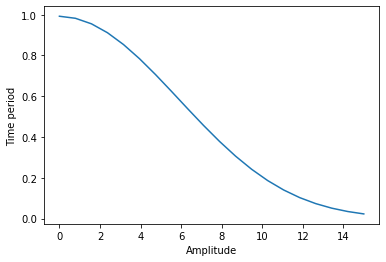

In [25]:
plt.plot(A,T)
plt.xlabel('Amplitude')
plt.ylabel('Time period')

We can see that for small amplitudes the time period is constant